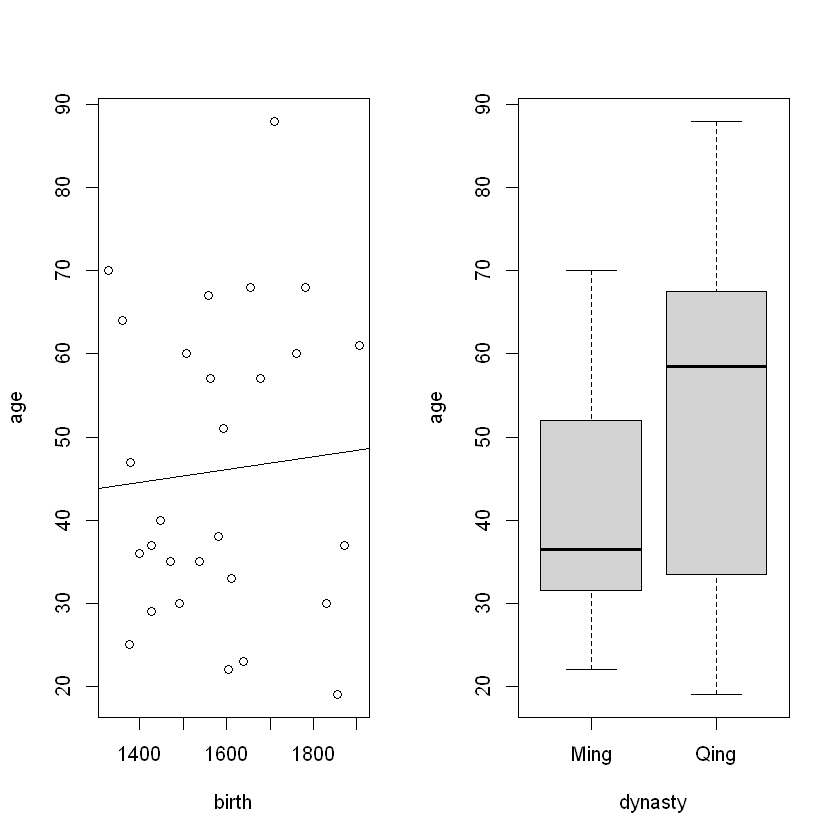

In [286]:
#### 코드
if (!require(rvest)) install.packages('rvest')
library(rvest)

if (!require(tidyverse)) install.packages('tidyverse')
library(tidyverse)

get_ming_info <- function(order){
    
    target_url <- 'https://en.wikipedia.org/wiki/List_of_emperors_of_the_Ming_dynasty'
    html <- ((target_url %>%
        read_html %>%
        html_nodes('table[class=wikitable]') %>%
        html_nodes('tr'))[order+1] %>%
        html_nodes('td') %>%
        html_text())[2]
    
    unclean_data <- html %>%
        strsplit(split = '\\(') %>%
        unlist()
    
    dynasty <- 'Ming'
    name <- unclean_data[1]
    
    years <- (gsub('\n|\\)', '', unclean_data[2]) %>%
        strsplit(split = ' ') %>%
        unlist())[c(3,6)]
    
    birth <- years[1]
    death <- years[2]
    
    return(c(dynasty, name, birth, death))
}

get_qing_info <- function(order){
    
    target_url <- 'https://en.wikipedia.org/wiki/List_of_emperors_of_the_Qing_dynasty'
    html <- ((target_url %>%
        read_html %>%
        html_nodes('table[class=wikitable]') %>%
        html_nodes('tr'))[order+1] %>%
        html_nodes('td') %>%
        html_text())[2]
    
    unclean_data <- html %>%
        strsplit(split = '\\(') %>%
        unlist()
    
    dynasty <- 'Qing'
    name <- unclean_data[1]
    
    years <- (gsub('\n|\\)', '', unclean_data[2]) %>%
        strsplit(split = ' ') %>%
        unlist())
    
    birth <- substr(years[3], 1, 4)
    death <- years[5]
    
    return(c(dynasty, name, birth, death))
}

data <- vector('list', 17+12)
for (i in 1:17){ # 명나라
    data[[i]] <- get_ming_info(i)
}
for (i in 1:13){ # 청나라
    data[[17+i]] <- get_qing_info(i)
}

final <- na.omit(do.call('rbind', data))
colnames(final) <- c('dynasty', 'name', 'birth', 'death')
write.table(final, 'China_king.txt', row.names = FALSE)

df <- data.frame(final)
df[,'birth'] = as.numeric(df[,'birth'])
df[,'death'] = as.numeric(df[,'death'])

df <- df %>% mutate(age = death - birth)

par(mfrow = c(1,2))

plot(df[,'birth'], df[,'age'],
     xlab = 'birth',
     ylab = 'age')
abline(lm(age ~ birth, data = df))

boxplot(df[,'age'] ~ factor(df[,'dynasty']),
        xlab = 'dynasty',
        ylab = 'age')